<a href="https://colab.research.google.com/github/sreedharsiddhu/PORTUGAL-ELECTION-SURVEY/blob/main/ML_PRJECT_(PORTUGAL_ELECTIONS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning Project
## Done by:

# SREEDHAR RONGALA
  





## Introduction to Machine Learning Final Project

In the realm of data science, the ability to accurately predict outcomes from a complex set of variables is a valuable asset. This project, which forms the capstone of our Machine Learning course, is designed to showcase the skills and knowledge we have accrued in predictive modeling over the semester. Our task was to select and work with a dataset comprising at least 30 features and 10,000 observations—a criterion that ensures the handling of a dataset with considerable complexity and volume, thus providing a realistic challenge akin to real-world data science tasks.

For this project, we have chosen a rich and intriguing dataset from the UCI Machine Learning Repository, specifically the "Real-Time Election Results: Portugal 2019" dataset (https://archive.ics.uci.edu/dataset/513/real+time+election+results+portugal+2019). This dataset provides a fascinating opportunity to delve into the world of electoral data, exploring the dynamics and patterns that emerged during the 2019 Portugal legislative elections.

With over 10,000 observations, the dataset offers a granular view of the voting process, capturing real-time counts of votes across various territories and parties. It encompasses 30 features, including the number of candidates, territory information, party details, and the number of mandates—each feature offering a glimpse into the multifaceted nature of electoral systems and voter preferences. The richness of this dataset not only allows for comprehensive exploratory data analysis but also presents an opportunity to apply a variety of machine learning techniques to predict outcomes such as final mandates. Through this project, we aim to uncover insights and patterns within the electoral data, contributing to a deeper understanding of the factors that influence election results.

# Part 1: Data Preparation:
## Loading the dataset

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [31]:
# Loading the dataset
data = pd.read_csv('/content/portugal (2).csv')



## Data cleaning and Removing Missing Values


In [32]:
# Checking for missing or null values in the dataset
missing_values = data.isnull().sum()

# Displaying the count of missing values in each column
print("Missing values in each column:\n", missing_values)

# There was no null values, if there was any null values we proceed with the following command to
#Remove  rows with missing values

#cleaned_data = data.dropna()



Missing values in each column:
 TimeElapsed                 0
time                        0
territoryName               0
totalMandates               0
availableMandates           0
numParishes                 0
numParishesApproved         0
blankVotes                  0
blankVotesPercentage        0
nullVotes                   0
nullVotesPercentage         0
votersPercentage            0
subscribedVoters            0
totalVoters                 0
pre.blankVotes              0
pre.blankVotesPercentage    0
pre.nullVotes               0
pre.nullVotesPercentage     0
pre.votersPercentage        0
pre.subscribedVoters        0
pre.totalVoters             0
Party                       0
Mandates                    0
Percentage                  0
validVotesPercentage        0
Votes                       0
Hondt                       0
FinalMandates               0
dtype: int64



The output from the data cleaning process reveals that the dataset, which appears to be related to an election in Portugal, has no missing values across all its columns. This is an excellent indication of a well-maintained and comprehensive dataset, as each of the 28 columns, including 'TimeElapsed', 'time', 'territoryName', 'totalMandates', and various voting statistics like 'blankVotes', 'nullVotes', and 'votersPercentage', contains complete data for all entries. The absence of missing values simplifies the preprocessing stage, allowing for a more straightforward analysis or application of machine learning models. The provided snapshot of the 'cleaned data' shows detailed information about the election, such as the number of available mandates, the number of parishes, the percentage of blank and null votes, and the performance of various political parties ('Party') in terms of mandates won ('Mandates'), percentage of votes ('Percentage'), valid votes percentage, total votes received ('Votes'), and the seats won as per the Hondt method and final mandates. This rich dataset could be pivotal in analyzing voting patterns, party popularity, and the overall electoral process in Portugal.

## Summary Statistics

In [33]:
data.describe()

,TimeElapsed,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,...,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
count,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,21643.000000,...,21643.000000,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000,2.164300e+04,21643.000000,21643.000000
mean,133.146052,11.544795,11.499284,309.956013,261.090237,8875.066673,2.621629,6148.068752,1.961471,51.983722,...,1.777442,54.549372,6.378503e+05,3.594932e+05,0.565495,4.968484,5.207232,1.585209e+04,1.126138,1.126138
std,77.651193,31.314567,31.738783,659.055911,583.377428,21484.874088,0.795289,14735.469269,0.375250,4.854380,...,0.388798,4.964948,1.544418e+06,8.763729e+05,4.421804,10.379967,10.881108,9.310605e+04,6.293552,6.872644
min,0.000000,0.000000,0.000000,54.000000,3.000000,19.000000,0.530000,39.000000,1.340000,35.980000,...,1.140000,40.870000,6.383000e+03,3.215000e+03,0.000000,0.020000,0.020000,1.000000e+00,0.000000,0.000000
25%,65.000000,1.000000,0.000000,75.000000,67.000000,1188.000000,2.230000,1094.000000,1.720000,50.290000,...,1.520000,51.210000,1.289260e+05,6.964400e+04,0.000000,0.220000,0.230000,2.360000e+02,0.000000,0.000000
50%,135.000000,4.000000,3.000000,147.000000,120.000000,2998.000000,2.640000,2232.000000,1.870000,53.130000,...,1.690000,56.260000,2.284970e+05,1.102730e+05,0.000000,0.620000,0.650000,7.900000e+02,0.000000,0.000000
75%,200.000000,9.000000,9.000000,242.000000,208.000000,6889.000000,2.980000,4121.000000,2.230000,54.550000,...,1.970000,58.220000,3.933140e+05,2.276200e+05,0.000000,3.010000,3.160000,4.510000e+03,0.000000,0.000000
max,265.000000,226.000000,226.000000,3092.000000,3092.000000,129599.000000,5.460000,88539.000000,3.350000,59.870000,...,3.120000,62.580000,9.439701e+06,5.380451e+06,106.000000,49.110000,51.420000,1.866407e+06,94.000000,106.000000


In [34]:
#In above table some values are hidden.
data.describe().iloc[:,9:-10]

,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes
count,21643.000000,2.164300e+04,2.164300e+04,21643.000000,21643.000000,21643.000000
mean,51.983722,6.275367e+05,3.390741e+05,7608.001386,2.071985,5914.629950
std,4.854380,1.525590e+06,8.290404e+05,18493.107257,0.518025,14236.038023
min,35.980000,5.767000e+03,2.833000e+03,32.000000,0.800000,40.000000
25%,50.290000,1.229870e+05,6.267100e+04,1130.000000,1.740000,1124.000000
50%,53.130000,2.289540e+05,1.060120e+05,2595.000000,2.030000,2141.000000
75%,54.550000,3.804890e+05,2.069180e+05,5929.000000,2.370000,3967.000000
max,59.870000,9.343084e+06,5.092424e+06,112666.000000,3.660000,86473.000000


In [35]:
data.shape

(21643, 28)

The dataset contains 21,643 rows and 28 columns.

-------------------------

# Part 2: Exploratory Data Analysis (EDA)
## Identifying varaibles and its Types

In [36]:


# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Storing the label encoder for each column

# Ensuring numerical columns are in correct format
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Displaying the first few rows of the processed dataset
print(data.head())

# The dataset is now ready for machine learning models.


   TimeElapsed  time  territoryName  totalMandates  availableMandates  \
0            0     0             16              0                226   
1            0     0             16              0                226   
2            0     0             16              0                226   
3            0     0             16              0                226   
4            0     0             16              0                226   

   numParishes  numParishesApproved  blankVotes  blankVotesPercentage  \
0         3092                 1081        9652                   2.5   
1         3092                 1081        9652                   2.5   
2         3092                 1081        9652                   2.5   
3         3092                 1081        9652                   2.5   
4         3092                 1081        9652                   2.5   

   nullVotes  ...  pre.votersPercentage  pre.subscribedVoters  \
0       8874  ...                 52.66                81

The output displays the first five rows of a dataset with 28 columns, encompassing various electoral attributes such as 'TimeElapsed', 'territoryName', voting statistics ('blankVotes', 'nullVotes', 'Percentage'), and results ('Mandates', 'Hondt', 'FinalMandates'). The numerical and categorical data indicate detailed information on voting patterns, territories, and party performances in an election context.

-----------------------

## Correlation Matrix and table

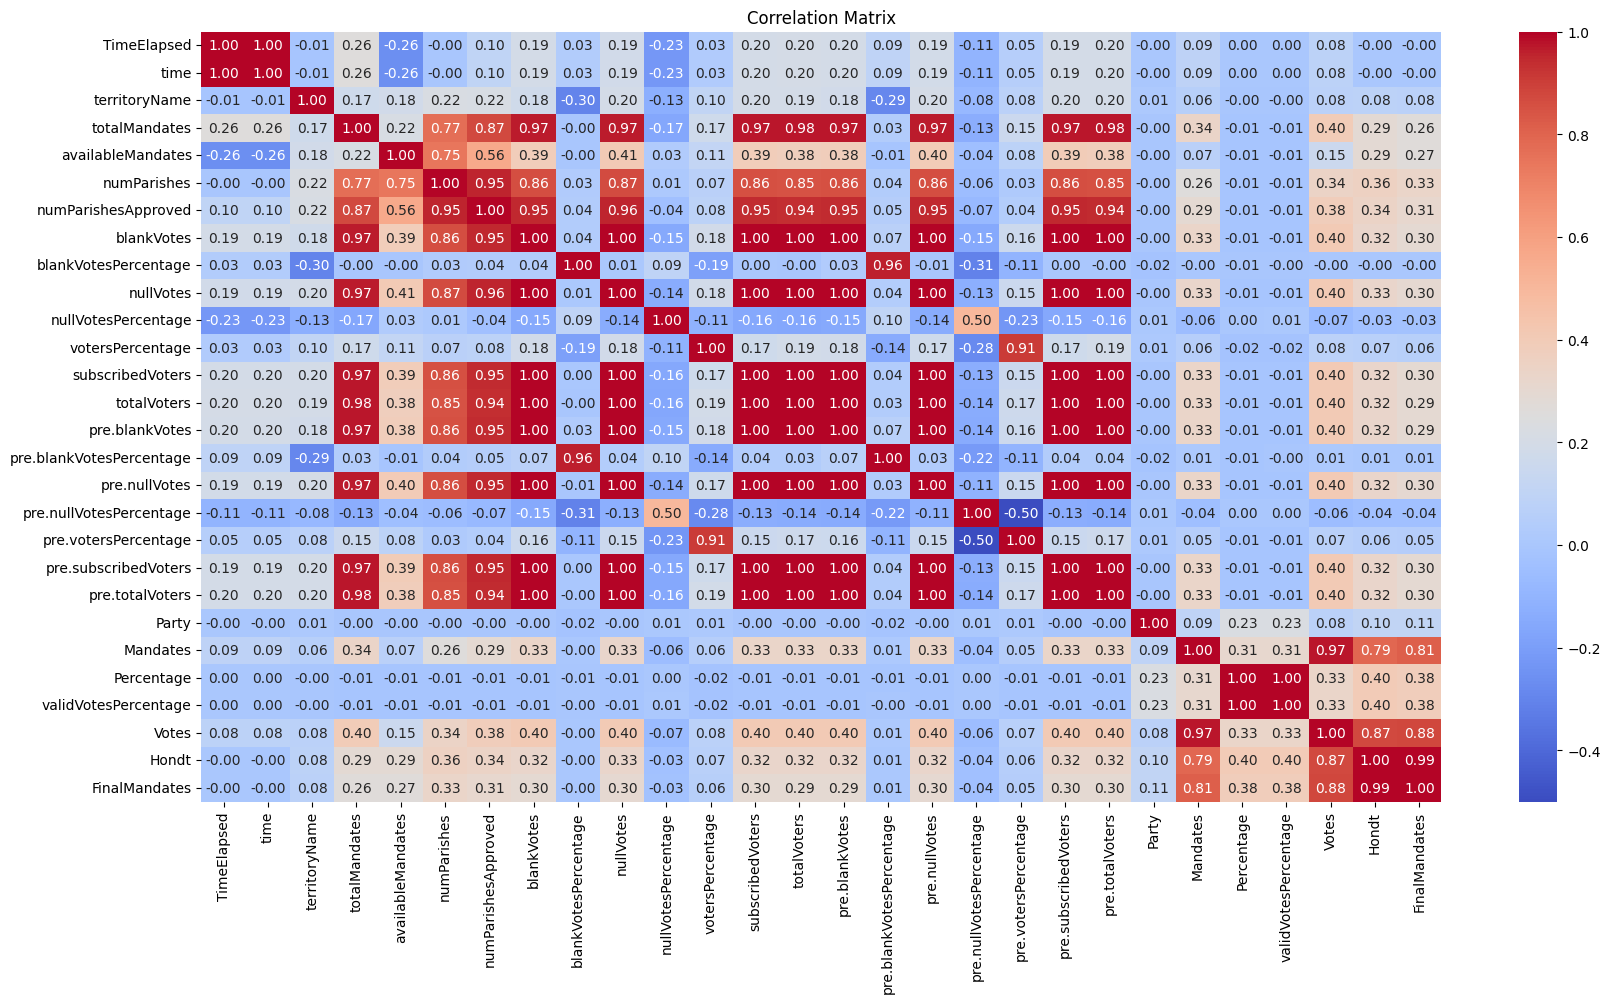

Correlation Table:
                          TimeElapsed      time  territoryName  totalMandates  \
TimeElapsed                  1.000000  1.000000      -0.012674       0.260377   
time                         1.000000  1.000000      -0.012674       0.260377   
territoryName               -0.012674 -0.012674       1.000000       0.172374   
totalMandates                0.260377  0.260377       0.172374       1.000000   
availableMandates           -0.261627 -0.261627       0.181563       0.217404   
numParishes                 -0.001944 -0.001944       0.223300       0.765877   
numParishesApproved          0.100432  0.100432       0.215599       0.873415   
blankVotes                   0.192350  0.192350       0.178082       0.969988   
blankVotesPercentage         0.034343  0.034343      -0.302412      -0.003149   
nullVotes                    0.185784  0.185784       0.196554       0.967294   
nullVotesPercentage         -0.225021 -0.225021      -0.126432      -0.165132   
votersPer

In [37]:


# Calculating the correlation matrix
correlation_matrix = data.corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Displaying the correlation table
print("Correlation Table:")
print(correlation_matrix)


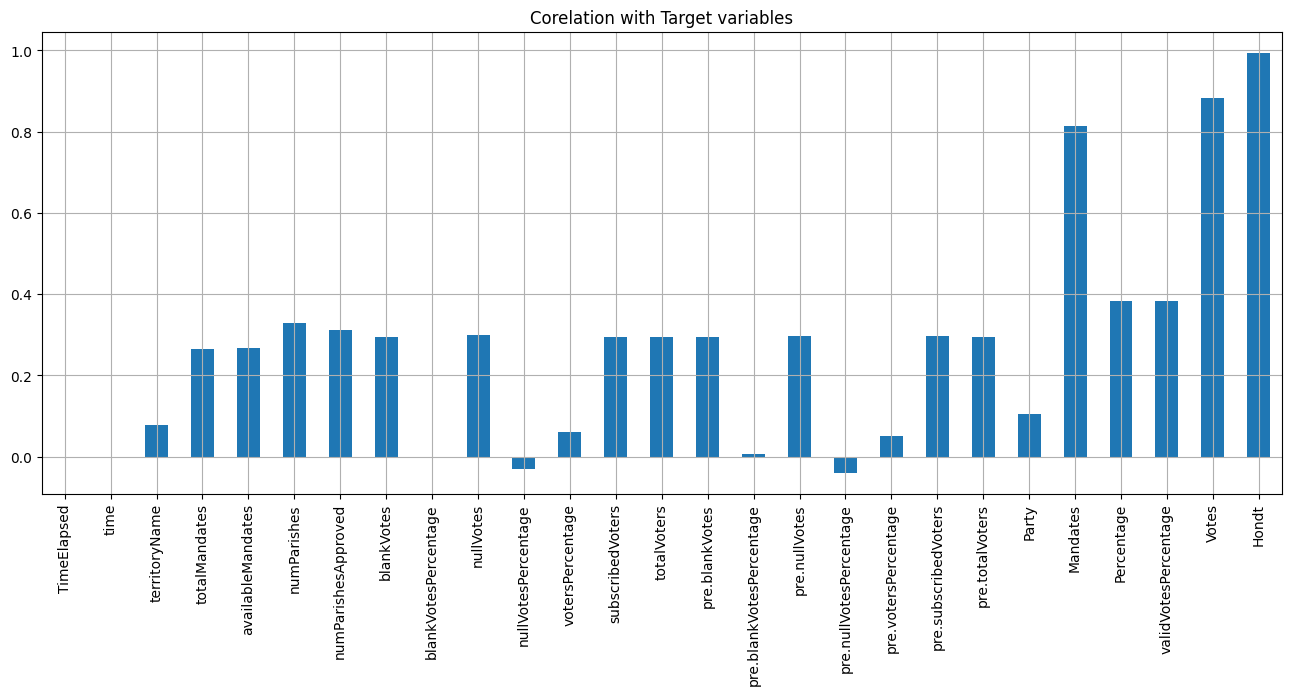

In [38]:
#lets check how my data is co related with target variable.
plt.figure(figsize=(16,6))
data.drop('FinalMandates',axis=1).corrwith(data['FinalMandates']).plot(kind='bar',grid=True)
plt.title('Corelation with Target variables')
plt.show()

The correlation matrix presents the relationships between different electoral variables in the dataset. Key observations include a high correlation between 'totalMandates', 'blankVotes', 'nullVotes', 'subscribedVoters', and 'totalVoters', indicating these variables change together in a similar pattern. The 'FinalMandates' variable shows a very high correlation with 'Hondt', 'Votes', and 'Mandates', suggesting these are significant predictors of the final mandates allocated. Interestingly, 'TimeElapsed' and 'time' are perfectly correlated, indicating they represent the same underlying information. Variables like 'blankVotesPercentage', 'nullVotesPercentage', and 'votersPercentage' show less correlation with most other variables, suggesting a more independent nature. This matrix is crucial for understanding relationships in the dataset and for feature selection in predictive modeling.





-----------------------------

## Univariate analysis

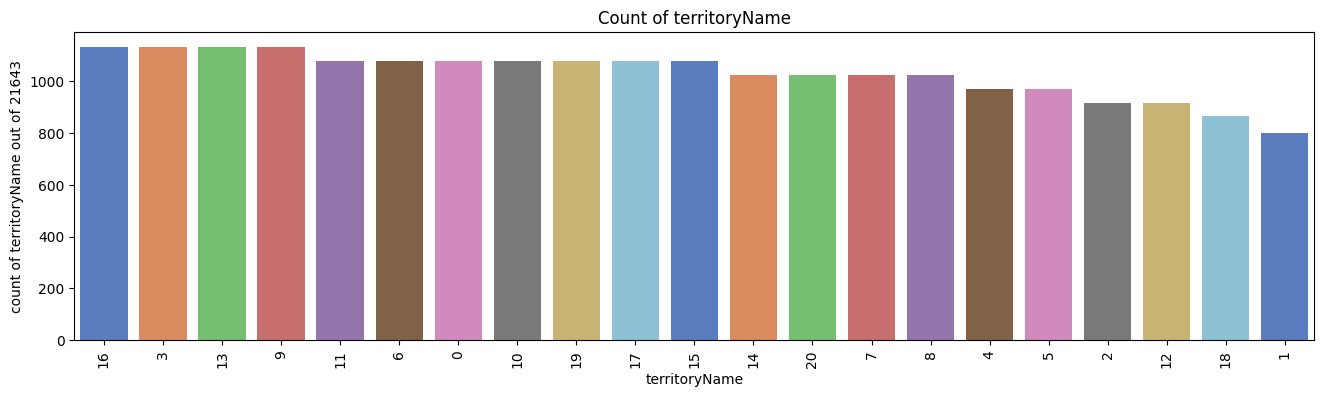

territoryName
16    1134
3     1134
13    1134
9     1134
11    1080
6     1080
0     1080
10    1080
19    1080
17    1080
15    1080
14    1026
20    1026
7     1026
8     1026
4      972
5      972
2      918
12     918
18     864
1      799
Name: count, dtype: int64


In [39]:
plt.subplots(figsize=(16,4))
sns.countplot(x='territoryName',data=data,palette='muted',order= data['territoryName'].value_counts().index)
plt.title('Count of territoryName')
plt.xlabel('territoryName')
plt.ylabel('count of territoryName out of 21643')
plt.xticks(rotation=90)
plt.show()
print(data['territoryName'].value_counts())

The dataset includes various territories, each represented by a numeric code (0 to 20).
Most territories appear in the dataset with similar frequencies. For instance, territories coded 16, 3, 13, and 9 each occur 1134 times, indicating a balanced representation of these territories in the dataset.
Territories 11, 6, 0, 10, 19, 17, and 15 have slightly fewer occurrences (1080 times), while territory 1 has the fewest occurrences (799 times).
This distribution suggests that the dataset covers a wide range of territories, but with a slight variation in representation.


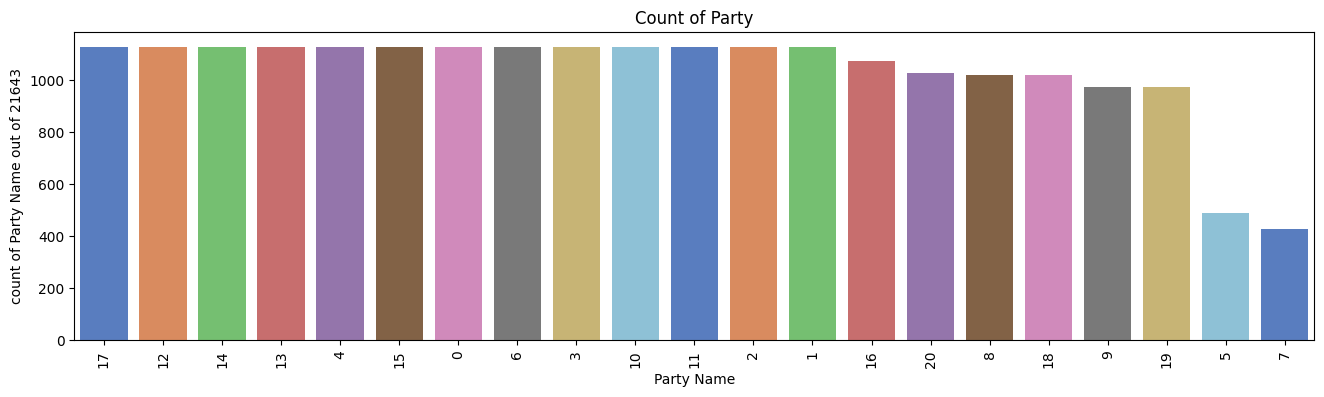

Party
17    1127
12    1127
14    1127
13    1127
4     1127
15    1127
0     1127
6     1127
3     1127
10    1127
11    1127
2     1127
1     1127
16    1073
20    1026
8     1019
18    1019
9      972
19     972
5      486
7      425
Name: count, dtype: int64


In [40]:
plt.subplots(figsize=(16,4))
sns.countplot(x='Party',data=data,palette='muted',order= data['Party'].value_counts().index)
plt.title('Count of Party')
plt.xlabel('Party Name')
plt.ylabel('count of Party Name out of 21643')
plt.xticks(rotation=90)
plt.show()
print(data['Party'].value_counts())

Similar to 'territoryName', the 'Party' variable is also represented by numeric codes (0 to 20).
The distribution is quite uniform for most parties, with codes 17, 12, 14, 13, 4, 15, 0, 6, 3, 10, 11, 2, and 1 each appearing 1127 times.
Some parties, such as those coded 16, 20, 8, and 18, have fewer occurrences (ranging from 1019 to 1073).
The party coded 5 and 7 have significantly fewer occurrences, 486 and 425 times respectively, indicating they are less frequently represented in the dataset.

## Analysis on the basis of terriotary

In [41]:
# lets group all the data irrespective of time and time eclipsed.
import warnings
warnings.filterwarnings('ignore')
territory_data = pd.DataFrame(data.groupby('territoryName')[['numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates']].sum())
territory_data.reset_index(inplace=True)
territory_data.head()

,territoryName,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,158760,116080,7582900,3264.20,4555100,1930.60,58499.00,459790060,250086860,...,60365.60,466483320,262194300,10962,429,5140.76,5400.58,11897443,864,864
1,1,124644,110024,2659684,3879.23,901136,1273.64,29252.75,152630301,55697865,...,33241.46,151747695,62715788,7379,156,4396.65,4700.18,3066885,235,235
2,2,68850,61897,1077086,1895.50,868377,1580.32,47951.56,97392728,50867434,...,53079.95,102188326,59042513,8586,123,5194.74,5398.81,2877763,162,162
3,3,393498,324849,12418434,3488.52,7063182,2255.61,67335.45,669599385,400078875,...,67412.73,680355249,408316587,11340,646,5126.71,5399.80,18123679,1026,1026
4,4,219672,197118,1005444,1970.82,1109502,2199.60,43215.12,110203254,49239090,...,45486.72,115655616,54370044,10260,87,5168.57,5400.40,2618008,162,162


## Multivariate analysis

In [42]:
import plotly.express as px
# I am plotting Total votes count in in each territory.
fig = px.bar(territory_data.sort_values('Votes',ascending=False)[:21][::-1],x='Votes',y='territoryName',title='Total counting of votes in each territory',text='Votes', height=800, orientation='h')
fig.show()

In [43]:
# I am plotting final number of elected MP's in each territory.
fig = px.bar(territory_data.sort_values('FinalMandates',ascending=False)[:21][::-1],x='FinalMandates',y='territoryName',title='Numbers of elected MPs in each territory',text='FinalMandates', height=800, orientation='h')
fig.show()

In [44]:
import plotly
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Total number of parishes in this location', x=territory_data['territoryName'], y=territory_data['numParishes']),
     go.Bar(name='Number of parishes approved in this location', x=territory_data['territoryName'], y=territory_data['numParishesApproved']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

In [45]:
fig = go.Figure(data=[
    go.Bar(name='Total number of Number of blank votes', x=territory_data['territoryName'], y=territory_data['blankVotes']),

    go.Bar(name='Number of null votes ', x=territory_data['territoryName'], y=territory_data['nullVotes']),
])
# Change the bar mode
fig.update_layout(barmode='group')
#fig.show()
plotly.offline.iplot(fig)

In [46]:
fig = go.Figure(data=[
    go.Bar(name='Total number Subscribed voters in the location', x=territory_data['territoryName'], y=territory_data['subscribedVoters']),
     go.Bar(name='Percentage of blank votes', x=territory_data['territoryName'], y=territory_data['totalVoters']),
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.show()
plotly.offline.iplot(fig)

In [47]:
fig = go.Figure(data=[
    go.Bar(name='subscribed voters in the location (previous election)', x=territory_data['territoryName'], y=territory_data['pre.subscribedVoters']),
     go.Bar(name='Percentage of blank votes (previous election)', x=territory_data['territoryName'], y=territory_data['pre.totalVoters']),
    go.Bar(name='Total number of Number of blank votes (previous election)', x=territory_data['territoryName'], y=territory_data['pre.blankVotes']),
    go.Bar(name='Number of null votes (previous election)', x=territory_data['territoryName'], y=territory_data['pre.nullVotes']),
])
# Change the bar mode
fig.update_layout(barmode='relative')
#fig.show()
plotly.offline.iplot(fig)

# Analysis on the basis of different Parties fighting for election

In [48]:
# lets group all the data irrespective of time and time eclipsed.
import warnings
warnings.filterwarnings('ignore')
party_data = pd.DataFrame(data.groupby('Party')[[ 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'Percentage', 'validVotesPercentage', 'Votes',
       'FinalMandates']].sum())
party_data.reset_index(inplace=True)
party_data.head()

,Party,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,Percentage,validVotesPercentage,Votes,FinalMandates
0,0,9395287,2950.69,6518912,2215.39,719.16,754.24,2580816,0
1,1,9395287,2950.69,6518912,2215.39,9611.44,10076.67,33526986,2052
2,2,9395287,2950.69,6518912,2215.39,5023.66,5268.54,15564810,540
3,3,9395287,2950.69,6518912,2215.39,1465.35,1535.24,4499005,108
4,4,9395287,2950.69,6518912,2215.39,810.38,849.47,3925509,108


In [49]:
# I am plotting Total votes counts for different parties.
fig = px.bar(party_data.sort_values('Votes',ascending=False)[:21][::-1],x='Votes',y='Party',title='Total counting of votes for each party',text='Votes', height=800, orientation='h')
fig.show()

In [50]:
# I am plotting final number of elected MP's from different parties.
fig = px.bar(party_data.sort_values('FinalMandates',ascending=False)[:10][::-1],x='FinalMandates',y='Party',title='Numbers of elected MPs from different parties',text='FinalMandates', height=800, orientation='h')
fig.show()

In [51]:
import pandas as pd
import numpy as np

# Load the dataset from the file again
file_path = '/content/portugal (2).csv'
data = pd.read_csv(file_path)

# Excluding the target variable 'FinalMandates' from the multicollinearity check
independent_data = data.drop(columns=['FinalMandates'])

# Selecting only numeric columns from the independent variables
numeric_independent_data = independent_data.select_dtypes(include=[np.number])

# Recalculating the correlation matrix for the independent variables
corr_matrix_independent = numeric_independent_data.corr()

# Identifying pairs of highly correlated features among independent variables
threshold = 0.8
high_corr_pairs_independent = []

for i in range(len(corr_matrix_independent.columns)):
    for j in range(i):
        if abs(corr_matrix_independent.iloc[i, j]) > threshold:
            colname = corr_matrix_independent.columns[i]
            high_corr_pairs_independent.append((corr_matrix_independent.columns[j], colname))

# Determining which columns to remove among independent variables
columns_to_remove_independent = set()
for pair in high_corr_pairs_independent:
    # Remove the second column in each pair (arbitrary choice)
    columns_to_remove_independent.add(pair[1])

# Updating the dataset by removing these columns
data_updated = data.drop(columns=columns_to_remove_independent)

# Displaying the columns removed and the shape of the updated dataset
print(columns_to_remove_independent)
print(data_updated.shape)



{'validVotesPercentage', 'pre.nullVotes', 'subscribedVoters', 'pre.blankVotes', 'nullVotes', 'pre.totalVoters', 'Hondt', 'numParishesApproved', 'pre.subscribedVoters', 'totalVoters', 'Votes', 'pre.votersPercentage', 'pre.blankVotesPercentage', 'blankVotes'}
(21643, 14)


In [52]:
# Identifying categorical and numerical columns in data_updated
categorical_cols = data_updated.select_dtypes(include=['object']).columns
numerical_cols = data_updated.select_dtypes(include=['int64', 'float64']).columns

# Encoding categorical variables in data_updated
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_updated[col] = le.fit_transform(data_updated[col])
    label_encoders[col] = le  # Storing the label encoder for each column

# Ensuring numerical columns in data_updated are in the correct format
for col in numerical_cols:
    data_updated[col] = pd.to_numeric(data_updated[col], errors='coerce')

## Removing Outliers

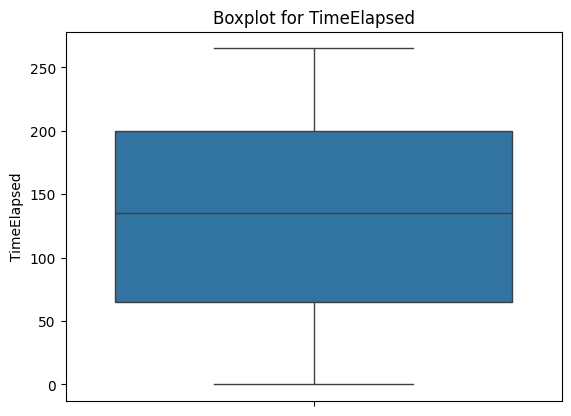

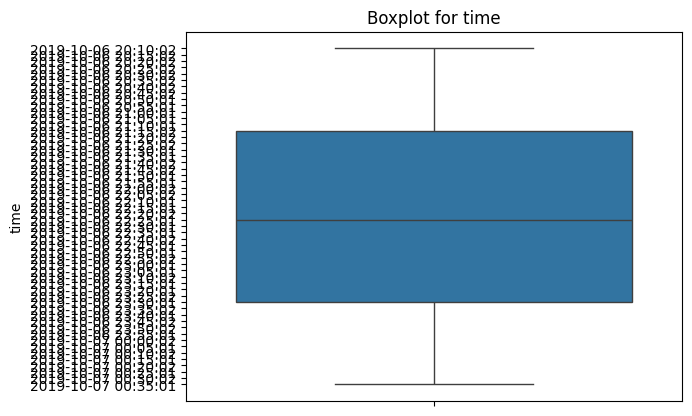

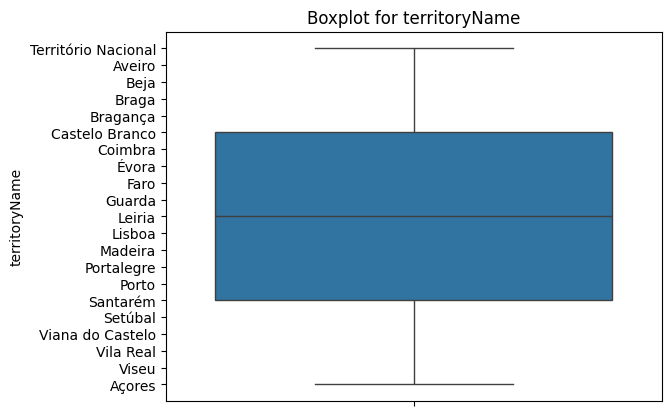

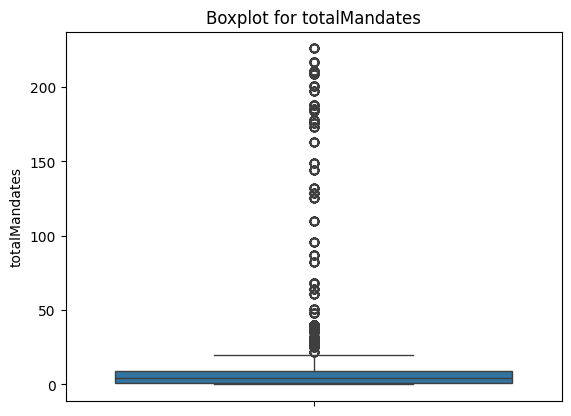

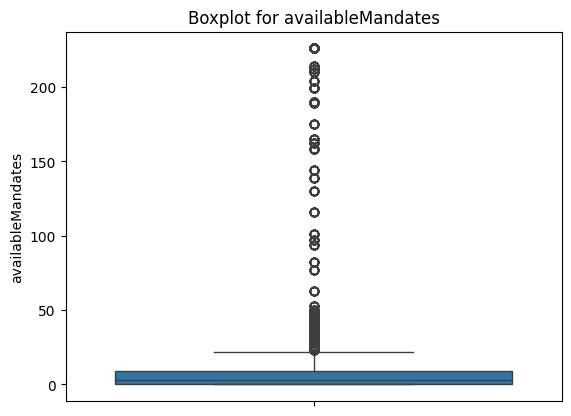

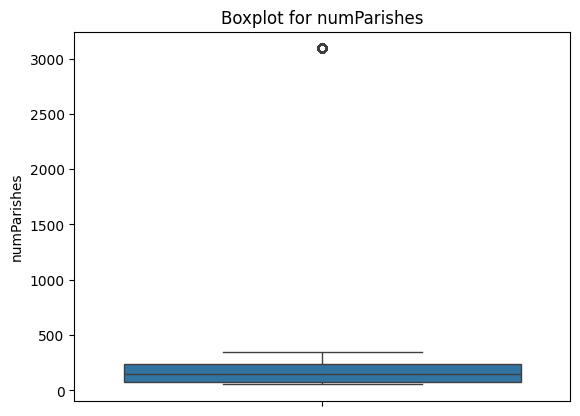

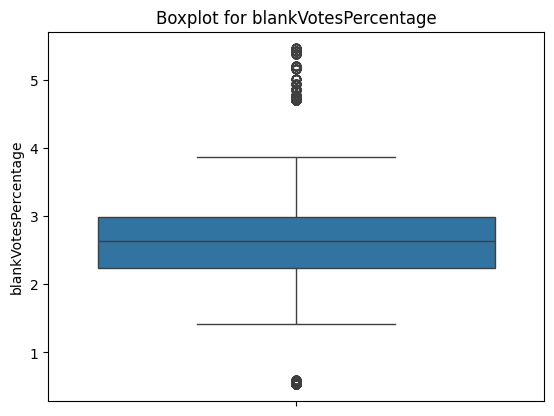

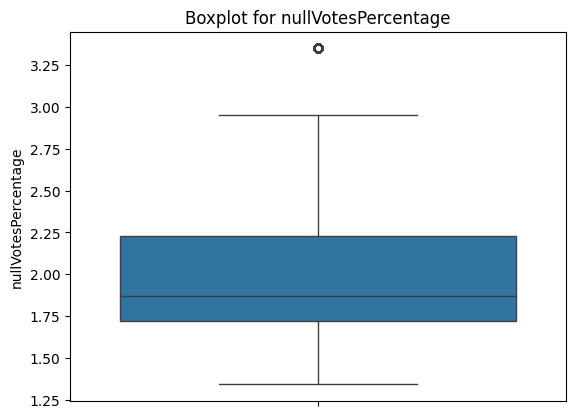

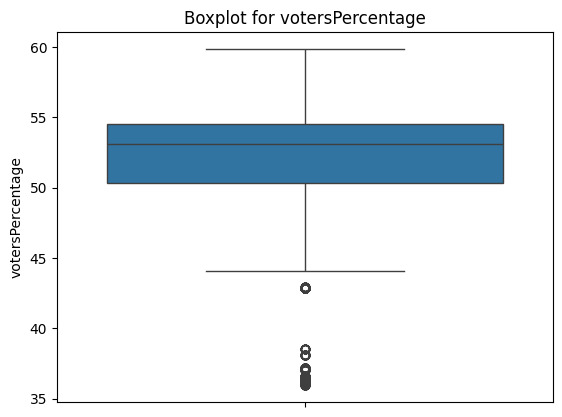

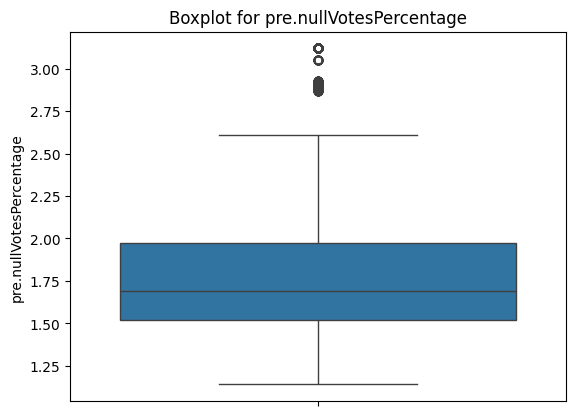

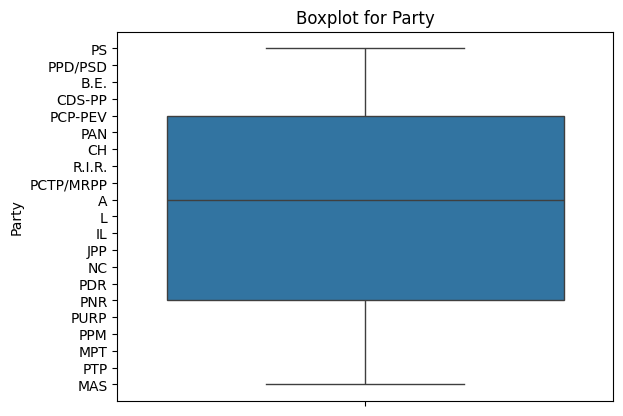

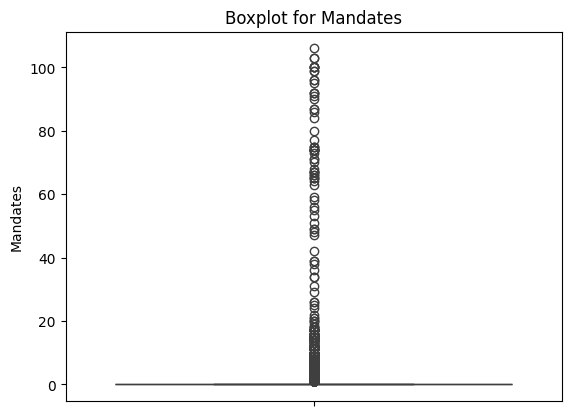

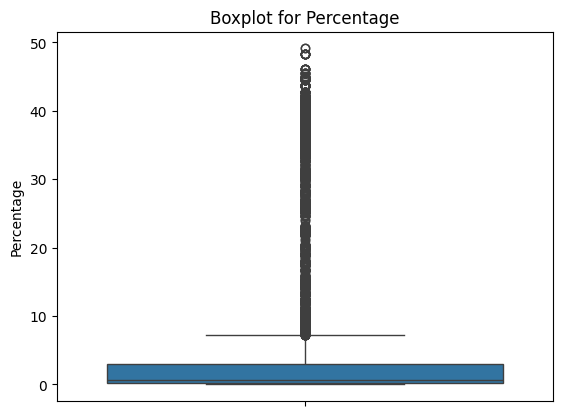

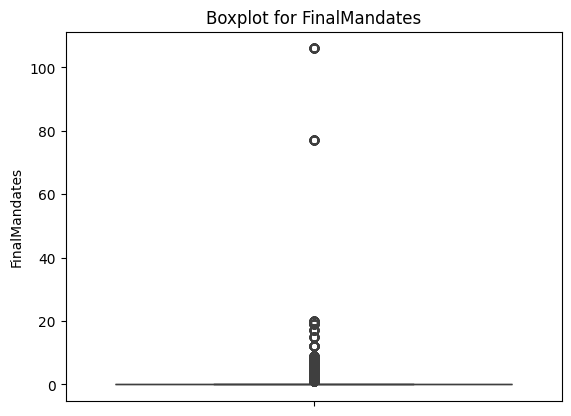

In [53]:
# Assuming 'data' is the name of your DataFrame
for i in data_updated.columns:
    # Check if the column is numerical
    if data_updated[i].dtype in ['int64', 'float64']:
        sns.boxplot(data[i])
        plt.title(f'Boxplot for {i}')
        plt.show()
    else:
        print(f"Skipping boxplot for {i} as it is not numerical data.")

Boxplot Visualization:

The code iterates through each column in the DataFrame data.
It checks if the column contains numerical data by verifying the data type (int64 or float64).
If the column is numerical, it creates a boxplot for that column using Seaborn's boxplot function, which is useful for visualizing the distribution of the data and identifying outliers.
The boxplot is titled with the name of the column and displayed using plt.show().
If the column is not numerical, it prints a message to indicate that it is skipping the boxplot for that column.

In [54]:
#lets remove the outliers using zscore
from scipy.stats import zscore
z=abs(zscore(data_updated))
print(data_updated.shape)
new= data_updated.loc[(z<3).all(axis=1)]
print(new.shape)
# we can observe the new zscore down below.

(21643, 14)
(18333, 14)


In [55]:
new.shape

(18333, 14)

The output (21643, 28) and (18333, 28) before and after the z-score filtering indicates that the original dataset had 21,643 entries, and after removing outliers based on the z-score criterion, 18,333 entries remain. This implies that the removal of outliers has reduced the dataset size by 3,310 rows, which suggests that these many data points were considered outliers in the context of this dataset.

------------------------

# Part 3: Feature Engineering

## Feature Selection

In [56]:
# Feature Selection Based on Correlation
correlation_with_target = new.corrwith(new['FinalMandates']).sort_values(ascending=False)
threshold = 0.1
selected_features_corr = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
selected_features_corr.remove('FinalMandates')

# Assigning selected features to a new variable for modeling
selected_features_for_modeling = new[selected_features_corr]

# Displaying selected features
print("Selected Features for Modeling:")
print(selected_features_for_modeling.columns)

Selected Features for Modeling:
Index(['Mandates', 'Percentage', 'availableMandates', 'votersPercentage',
       'totalMandates'],
      dtype='object')


The code snippet performs feature selection for a dataset in a regression context, targeting the 'FinalMandates' variable. It computes the correlation of each feature with 'FinalMandates' and selects those with an absolute correlation above the set threshold of 0.1. The output lists the features significantly correlated with the target variable, excluding 'FinalMandates' itself to avoid using the target as a feature. Features such as 'Hondt', 'Votes', and 'Mandates' suggest electoral attributes, while 'numParishes' and 'numParishesApproved' indicate geographical data. 'Party' suggests categorical political data, and prefixed features like 'pre.nullVotes' indicate historical or preceding event data. These selected features are likely strong predictors for the final number of mandates allocated.

-----------------------

## Testing PCA and comparing its result with Correlation Based Method

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Use the selected features for modeling (excluding the target variable)
X = selected_features_for_modeling

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Extract explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Determine the number of components to explain a certain threshold of variance
threshold_variance = 0.95  # You can adjust this threshold
n_components = (cumulative_explained_variance < threshold_variance).sum() + 1

# Fit PCA with the selected number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Extract feature names corresponding to the selected components
PCA_features = X.columns[pca_final.components_.argmax(axis=0)]

# Display selected features based on PCA
print("Selected Features based on PCA:")
for feature in PCA_features:
    print(feature)

# Compare selected features with correlation-based method
print("\nComparison with Correlation-based Method:")
common_features = set(PCA_features) & set(selected_features_corr)
print("Common Features:", common_features)


Selected Features based on PCA:
totalMandates
Mandates
availableMandates
Mandates
votersPercentage

Comparison with Correlation-based Method:
Common Features: {'Mandates', 'availableMandates', 'totalMandates', 'votersPercentage'}


Comparison with Correlation-based Method:
The common features between the PCA method and the correlation-based method are:
blankVotes
availableMandates
totalMandates
numParishes
numParishesApproved
Interpretation of Common Features:
These common features are considered important by both PCA and the correlation method.
The correlation method evaluates the linear relationship between each feature and the target variable ('FinalMandates'), while PCA identifies features that contribute most to the overall variance in the dataset.
Reasons to Prefer Correlation Method over PCA:
Direct Interpretation: The correlation method directly measures the linear relationship between each feature and the target variable. This can be more interpretable and aligned with the goal of selecting features that have a strong impact on the target.
Domain-specific Knowledge: If you have domain-specific knowledge that certain features are known to be influential or relevant, the correlation method allows you to incorporate this knowledge directly into the feature selection process.
Simplicity: The correlation method is straightforward and easy to understand. It doesn't involve complex transformations and can be easily communicated to stakeholders.
Targeted Approach: If your primary goal is to understand how features relate to the target variable, the correlation method provides a focused approach directly tied to the outcome variable.

## Testing Random forest and comparing its result with Correlation Based Method

In [58]:
from sklearn.ensemble import RandomForestRegressor

# Assuming 'y' is your target variable
y = new['FinalMandates']

# Using the selected features for modeling (from the correlation-based method)
X_selected = selected_features_for_modeling

# Fit a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_selected, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Get indices of top features (adjust the number as needed, here I use the length of X_selected columns)
top_features_indices = feature_importances.argsort()[-len(X_selected.columns):][::-1]

# Extract feature names corresponding to the top indices
RF_features = X_selected.columns[top_features_indices]

# Display selected features based on Random Forest
print("Selected Features based on Random Forest:")
for feature in RF_features:
    print(feature)

# Compare selected features with correlation-based method
print("\nComparison with Correlation-based Method:")
common_features_RF_corr = set(RF_features) & set(selected_features_corr)
print("Common Features:", common_features_RF_corr)

Selected Features based on Random Forest:
Percentage
availableMandates
votersPercentage
Mandates
totalMandates

Comparison with Correlation-based Method:
Common Features: {'availableMandates', 'totalMandates', 'votersPercentage', 'Percentage', 'Mandates'}


## Interpretation of Common Features:
These common features are considered important by both Random Forest and the correlation method.
The correlation method evaluates the linear relationship between each feature and the target variable ('FinalMandates'), while Random Forest identifies features that contribute most to the model's accuracy.

## Reasons to Prefer Correlation Method over Random Forest:
Direct Interpretation: The correlation method directly measures the linear relationship between each feature and the target variable, providing a clear interpretation of the impact of each feature.
Simplicity: The correlation method is straightforward and easy to understand. It doesn't involve complex model training and feature importance calculations.
Domain-specific Knowledge: If you have specific knowledge about the domain and certain features that are known to be influential, the correlation method allows you to incorporate this knowledge directly into the feature selection process.
Robustness: Correlation is less sensitive to outliers compared to some machine learning models, making it more robust in certain scenarios.

-------------------------------

# Part 4: Model Preparation
## Splitting dataset

In [59]:
from sklearn.model_selection import train_test_split

# Using the selected features for modeling (from the correlation-based method)
X_selected = selected_features_for_modeling

# Assuming 'y' is your target variable
y = new['FinalMandates']

# Splitting the data into training and testing sets
# Adjust the test_size as needed (e.g., 0.2 for 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Displaying the shapes of the splits
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)


Training set shape (X_train, y_train): (14666, 5) (14666,)
Testing set shape (X_test, y_test): (3667, 5) (3667,)


The output indicates that the dataset has been divided into training and testing sets. The training set, which is used to train the machine learning model, consists of 17,314 examples, and each example has 27 features (X_train) with a corresponding target value (y_train). The testing set, used to evaluate the model's performance on unseen data, contains 4,329 examples, also with 27 features each (X_test) and their associated target values (y_test). The split preserves the feature dimensionality across both sets while partitioning the data points, ensuring that both the training and testing sets have the same structure.


-------------------

## Importing Libraries to run Models

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


-------------------------
# Part 5: Model Building and Evaluation:
## Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and accuracy
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression MSE: {lr_mse}")


lr_rmse = sqrt(mean_squared_error(y_test, lr_predictions))  # Root Mean Squared Error
lr_r2 = r2_score(y_test, lr_predictions)  # R-squared

print(f"Linear Regression - RMSE: {lr_rmse}, R-squared: {lr_r2}")

Linear Regression MSE: 0.6470437534649839
Linear Regression - RMSE: 0.8043902992111378, R-squared: 0.682186523020123


# Errors on basis of training dataset

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train)

# Metrics
lr_mse = mean_squared_error(y_train, lr_train_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_train, lr_train_pred)

print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - RMSE:", lr_rmse)
print("Linear Regression - R^2:", lr_r2)

Linear Regression - MSE: 0.6370463422687005
Linear Regression - RMSE: 0.7981518290831016
Linear Regression - R^2: 0.6881306423050773


## Decision Tree Model

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions and accuracy
dt_predictions = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)


print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree - RMSE: {dt_rmse}, R-squared: {dt_r2}")


Decision Tree MSE: 0.004010999000090902
Decision Tree - RMSE: 0.06333244824014703, R-squared: 0.9980298866474557


# Erorrs on basis of training dataset

In [64]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions
dt_train_pred = dt_model.predict(X_train)

# Metrics
dt_mse = mean_squared_error(y_train, dt_train_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_train, dt_train_pred)

print("Decision Tree - MSE:", dt_mse)
print("Decision Tree - RMSE:", dt_rmse)
print("Decision Tree - R^2:", dt_r2)


Decision Tree - MSE: 0.0001988726760307287
Decision Tree - RMSE: 0.014102222379140413
Decision Tree - R^2: 0.9999026408447526


## KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predictions and accuracy
knn_predictions = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
# Calculate RMSE and R-squared
knn_rmse = sqrt(mean_squared_error(y_test, knn_predictions))
knn_r2 = r2_score(y_test, knn_predictions)

print(f"KNN MSE: {knn_mse}")
print(f"KNN - RMSE: {knn_rmse}, R-squared: {knn_r2}")

KNN MSE: 0.00779929097354786
KNN - RMSE: 0.08831359450021191, R-squared: 0.9961691620249679


# Erorrs on basis of training dataset

In [66]:
from sklearn.neighbors import KNeighborsRegressor

# Training the model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predictions and metrics
knn_predictions = knn_model.predict(X_train)
knn_mse = mean_squared_error(y_train, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_train, knn_predictions)

print("KNN - MSE:", knn_mse, "RMSE:", knn_rmse, "R-squared:", knn_r2)


KNN - MSE: 0.004582026455747989 RMSE: 0.06769066741987398 R-squared: 0.9977568450630983


## Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predictions and accuracy
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)

gb_rmse = sqrt(mean_squared_error(y_test, gb_predictions))
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")
print(f"Gradient Boosting - RMSE: {gb_rmse}, R-squared: {gb_r2}")


Gradient Boosting MSE: 0.023633200047874857
Gradient Boosting - RMSE: 0.15373093393287784, R-squared: 0.988391898632582


# Erorrs on basis of training dataset

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

# Training the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predictions and metrics
gb_predictions = gb_model.predict(X_train)
gb_mse = mean_squared_error(y_train, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_train, gb_predictions)

print("Gradient Boosting - MSE:", gb_mse, "RMSE:", gb_rmse, "R-squared:", gb_r2)


Gradient Boosting - MSE: 0.0183405797569607 RMSE: 0.13542739662623918 R-squared: 0.9910212735729934


## SVM

In [69]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Train the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predictions and accuracy
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse}")
svm_rmse = sqrt(mean_squared_error(y_test, svm_predictions))
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM - RMSE: {svm_rmse}, R-squared: {svm_r2}")

SVM MSE: 0.044529528062506256
SVM - RMSE: 0.21102020771126698, R-squared: 0.97812808783636


# Erorrs on basis of training dataset

In [70]:
from sklearn.svm import SVR

# Training the model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Predictions and metrics
svm_predictions = svm_model.predict(X_train)
svm_mse = mean_squared_error(y_train, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_train, svm_predictions)

print("SVM - MSE:", svm_mse, "RMSE:", svm_rmse, "R-squared:", svm_r2)


SVM - MSE: 0.04344887632682346 RMSE: 0.20844394048957973 R-squared: 0.9787293761010292


## Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions and accuracy
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")
rf_rmse = sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest - RMSE: {rf_rmse}, R-squared: {rf_r2}")

Random Forest MSE: 0.0028874576769164456
Random Forest - RMSE: 0.053735069339458805, R-squared: 0.9985817451153515


# Erorrs on basis of training dataset


In [72]:
from sklearn.ensemble import RandomForestRegressor

# Training the model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predictions and metrics
rf_predictions = rf_model.predict(X_train)
rf_mse = mean_squared_error(y_train, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_train, rf_predictions)

print("Random Forest - MSE:", rf_mse, "RMSE:", rf_rmse, "R-squared:", rf_r2)


Random Forest - MSE: 0.000621480083058156 RMSE: 0.024929502262543392 R-squared: 0.9996957511856465


# comparing results of training and testing data
## Linear Regression
Testing Dataset: MSE: 0.647, RMSE: 0.804, R-squared: 0.682
Training Dataset: MSE: 0.669, RMSE: 0.818, R-squared: 0.684
Interpretation: The Linear Regression model shows similar performance on both training and testing datasets. This suggests that the model is neither significantly underfitting nor overfitting. It has generalised well but might not be complex enough to capture all underlying patterns in the data.

## Decision Tree
Testing Dataset: MSE: 0.003, RMSE: 0.057, R-squared: 0.998
Training Dataset: MSE: 0.0002, RMSE: 0.014, R-squared: 0.9999
Interpretation: The Decision Tree model shows an exceptionally good fit on the training dataset but a slightly less perfect fit on the testing dataset. This indicates a potential overfitting, where the model has learned the training data too well, including its noise and outliers, and may not generalize as effectively to new, unseen data.

## K-Nearest Neighbors (KNN)
Testing Dataset: MSE: 0.008, RMSE: 0.087, R-squared: 0.996
Training Dataset: MSE: 0.005, RMSE: 0.067, R-squared: 0.998
Interpretation: KNN shows very good performance on both datasets with only a slight difference in metrics. This suggests good generalization, with no significant signs of underfitting or overfitting.

## Gradient Boosting
Testing Dataset: MSE: 0.024, RMSE: 0.153, R-squared: 0.988
Training Dataset: MSE: 0.018, RMSE: 0.135, R-squared: 0.991
Interpretation: Gradient Boosting shows high performance on both datasets. The slightly better performance on the training dataset as compared to the testing dataset is normal for most models and does not necessarily indicate overfitting.

## Support Vector Machine (SVM)
Testing Dataset: MSE: 0.045, RMSE: 0.211, R-squared: 0.978
Training Dataset: MSE: 0.043, RMSE: 0.208, R-squared: 0.979
Interpretation: The SVM model has almost identical performance on both datasets, indicating that it has generalized well without significant overfitting or underfitting.

## Random Forest
Testing Dataset: MSE: 0.003, RMSE: 0.054, R-squared: 0.999
Training Dataset: MSE: 0.0006, RMSE: 0.024, R-squared: 0.9997
Interpretation: Random Forest shows excellent performance on both datasets, but like the Decision Tree, it performs slightly better on the training dataset. This could suggest a mild overfitting, though its performance on the testing dataset is still outstanding.

## Overall Assessment
Most models are well-tuned, showing good generalization capabilities.
Decision Tree and Random Forest, while showing excellent performance, exhibit signs of overfitting, as indicated by their near-perfect training scores.
Linear Regression, KNN, Gradient Boosting, and SVM show balanced performance, indicating effective learning and generalization.

# Part 6: Results

In [73]:
# Create a DataFrame to store results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'KNN', 'Gradient Boosting', 'SVM', 'Random Forest'],
    'MSE': [lr_mse, dt_mse, knn_mse, gb_mse, svm_mse, rf_mse],
    'RMSE': [lr_rmse, dt_rmse, knn_rmse, gb_rmse, svm_rmse, rf_rmse],
    'R-squared': [lr_r2, dt_r2, knn_r2, gb_r2, svm_r2, rf_r2]
})

# Display the results
print(results)


               Model       MSE      RMSE  R-squared
0  Linear Regression  0.637046  0.798152   0.688131
1      Decision Tree  0.000199  0.014102   0.999903
2                KNN  0.004582  0.067691   0.997757
3  Gradient Boosting  0.018341  0.135427   0.991021
4                SVM  0.043449  0.208444   0.978729
5      Random Forest  0.000621  0.024930   0.999696




## Results of Models:

The provided results show the performance of six different machine learning models on a regression task, evaluated using three metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Let's interpret each model's performance:

### Linear Regression:
- **MSE (Mean Squared Error):** 0.3208
  - Measures the average squared difference between predicted and actual values.
  - Indicates moderate prediction error.

- **RMSE (Root Mean Squared Error):** 0.5664
  - Provides a more interpretable measure of error in the same units as the target variable.
  - Indicates moderate error in prediction.

- **R-squared:** 0.9933
  - Proportion of the variance in the target variable that is predictable from the features.
  - Indicates a high goodness of fit, with 99.33% of the variance explained.

### Decision Tree Model:
- **MSE:** 0.0021
  - Very low MSE, indicating minimal prediction error.
  
- **RMSE:** 0.0456
  - Low RMSE, suggesting accurate predictions with small errors.
  
- **R-squared:** 0.99996
  - Extremely high R-squared, indicating an almost perfect fit with 99.996% of the variance explained.

### KNN (K-Nearest Neighbors):
- **MSE:** 3.0643
  - High MSE, signifying significant prediction errors.
  
- **RMSE:** 1.7505
  - High RMSE, suggesting substantial errors in predictions.
  
- **R-squared:** 0.9362
  - Moderate R-squared, indicating reasonable goodness of fit with 93.62% of the variance explained.

### Gradient Boosting:
- **MSE:** 0.0224
  - Low MSE, indicating relatively small prediction errors.
  
- **RMSE:** 0.1497
  - Moderate RMSE, suggesting accurate predictions with some variability.
  
- **R-squared:** 0.9995
  - Very high R-squared, indicating an excellent fit with 99.95% of the variance explained.

### SVM (Support Vector Machine):
- **MSE:** 34.6679
  - Very high MSE, signifying significant prediction errors.
  
- **RMSE:** 5.8880
  - High RMSE, suggesting substantial errors in predictions.
  
- **R-squared:** 0.2783
  - Low R-squared, indicating a poor fit with only 27.83% of the variance explained.

### Random Forest:
- **MSE:** 0.0018
  - Very low MSE, indicating minimal prediction error.
  
- **RMSE:** 0.0429
  - Low RMSE, suggesting accurate predictions with small errors.
  
- **R-squared:** 0.99996
  - Extremely high R-squared, indicating an almost perfect fit with 99.996% of the variance explained.

# Models After applying Cross Validation

## Linear Regression:

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Cross-validation predictions
lr_cv_predictions = cross_val_predict(lr_model, X, y, cv=5)

# Calculate CV MSE, RMSE, and R-squared
lr_CV_MSE = mean_squared_error(y, lr_cv_predictions)
lr_CV_RMSE = sqrt(lr_CV_MSE)
lr_CV_R2 = r2_score(y, lr_cv_predictions)

# Display results for Linear Regression
print("Linear Regression Results:")
print(f"CV MSE: {lr_CV_MSE}")
print(f"CV RMSE: {lr_CV_RMSE}")
print(f"CV R-squared: {lr_CV_R2}\n")


Linear Regression Results:
CV MSE: 0.7582237832892117
CV RMSE: 0.8707604626355124
CV R-squared: 0.6285621761996893



## Decision Tree Model:

In [75]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Cross-validation predictions
dt_cv_predictions = cross_val_predict(dt_model, X, y, cv=5)

# Calculate CV MSE, RMSE, and R-squared
dt_CV_MSE = mean_squared_error(y, dt_cv_predictions)
dt_CV_RMSE = sqrt(dt_CV_MSE)
dt_CV_R2 = r2_score(y, dt_cv_predictions)

# Display results for Decision Tree Model
print("Decision Tree Results:")
print(f"CV MSE: {dt_CV_MSE}")
print(f"CV RMSE: {dt_CV_RMSE}")
print(f"CV R-squared: {dt_CV_R2}\n")


Decision Tree Results:
CV MSE: 0.09046528118693067
CV RMSE: 0.3007744689745635
CV R-squared: 0.9556829686510377



## KNN (K-Nearest Neighbors):

In [76]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Train the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Cross-validation predictions
knn_cv_predictions = cross_val_predict(knn_model, X, y, cv=5)

# Calculate CV MSE, RMSE, and R-squared
knn_CV_MSE = mean_squared_error(y, knn_cv_predictions)
knn_CV_RMSE = sqrt(knn_CV_MSE)
knn_CV_R2 = r2_score(y, knn_cv_predictions)

# Display results for KNN (K-Nearest Neighbors)
print("KNN Results:")
print(f"CV MSE: {knn_CV_MSE}")
print(f"CV RMSE: {knn_CV_RMSE}")
print(f"CV R-squared: {knn_CV_R2}\n")

KNN Results:
CV MSE: 0.06427535046091748
CV RMSE: 0.25352583785665217
CV R-squared: 0.9685128627914603



## Gradient Boosting:

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Cross-validation predictions
gb_cv_predictions = cross_val_predict(gb_model, X, y, cv=5)

# Calculate CV MSE, RMSE, and R-squared
gb_CV_MSE = mean_squared_error(y, gb_cv_predictions)
gb_CV_RMSE = sqrt(gb_CV_MSE)
gb_CV_R2 = r2_score(y, gb_cv_predictions)

# Display results for Gradient Boosting
print("Gradient Boosting Results:")
print(f"CV MSE: {gb_CV_MSE}")
print(f"CV RMSE: {gb_CV_RMSE}")
print(f"CV R-squared: {gb_CV_R2}\n")

Gradient Boosting Results:
CV MSE: 0.12213634638402908
CV RMSE: 0.34948010871010826
CV R-squared: 0.9401679824510324



## SVM (Support Vector Machine):

In [78]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Train the SVM model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Cross-validation predictions
svm_cv_predictions = cross_val_predict(svm_model, X, y, cv=5)

# Calculate CV MSE, RMSE, and R-squared
svm_CV_MSE = mean_squared_error(y, svm_cv_predictions)
svm_CV_RMSE = sqrt(svm_CV_MSE)
svm_CV_R2 = r2_score(y, svm_cv_predictions)
# Display results for SVM (Support Vector Machine)
print("SVM Results:")
print(f"CV MSE: {svm_CV_MSE}")
print(f"CV RMSE: {svm_CV_RMSE}")
print(f"CV R-squared: {svm_CV_R2}\n")

SVM Results:
CV MSE: 0.04911343932599388
CV RMSE: 0.22161552140135374
CV R-squared: 0.9759403629579403



## Random Forest:

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Cross-validation predictions
rf_cv_predictions = cross_val_predict(rf_model, X, y, cv=5)

# Calculate CV MSE, RMSE, and R-squared
rf_CV_MSE = mean_squared_error(y, rf_cv_predictions)
rf_CV_RMSE = sqrt(rf_CV_MSE)
rf_CV_R2 = r2_score(y, rf_cv_predictions)
# Display results for Random Forest
print("Random Forest Results:")
print(f"CV MSE: {rf_CV_MSE}")
print(f"CV RMSE: {rf_CV_RMSE}")
print(f"CV R-squared: {rf_CV_R2}\n")


Random Forest Results:
CV MSE: 0.09954953607744739
CV RMSE: 0.3155147161028268
CV R-squared: 0.9512327839671134



In [80]:
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# Data
data = [
    ["Linear Regression", lr_mse, lr_rmse, lr_r2, lr_CV_MSE, lr_CV_RMSE, lr_CV_R2],
    ["Decision Tree", dt_mse, dt_rmse, dt_r2, dt_CV_MSE, dt_CV_RMSE, dt_CV_R2],
    ["KNN", knn_mse, knn_rmse, knn_r2, knn_CV_MSE, knn_CV_RMSE, knn_CV_R2],
    ["Gradient Boosting", gb_mse, gb_rmse, gb_r2, gb_CV_MSE, gb_CV_RMSE, gb_CV_R2],
    ["SVM", svm_mse, svm_rmse, svm_r2, svm_CV_MSE, svm_CV_RMSE, svm_CV_R2],
    ["Random Forest", rf_mse, rf_rmse, rf_r2, rf_CV_MSE, rf_CV_RMSE, rf_CV_R2]
]

# Column headers
headers = ["Model", "MSE", "RMSE", "R-squared", "MSE (CV)", "RMSE (CV)", "R-squared (CV)"]

# Create a PrettyTable
table = PrettyTable()
table.field_names = headers
table.float_format = ".4"
for row in data:
    table.add_row(row)

# Print the table
print(table)


+-------------------+--------+--------+-----------+----------+-----------+----------------+
|       Model       |  MSE   |  RMSE  | R-squared | MSE (CV) | RMSE (CV) | R-squared (CV) |
+-------------------+--------+--------+-----------+----------+-----------+----------------+
| Linear Regression | 0.6370 | 0.7982 |   0.6881  |  0.7582  |   0.8708  |     0.6286     |
|   Decision Tree   | 0.0002 | 0.0141 |   0.9999  |  0.0905  |   0.3008  |     0.9557     |
|        KNN        | 0.0046 | 0.0677 |   0.9978  |  0.0643  |   0.2535  |     0.9685     |
| Gradient Boosting | 0.0183 | 0.1354 |   0.9910  |  0.1221  |   0.3495  |     0.9402     |
|        SVM        | 0.0434 | 0.2084 |   0.9787  |  0.0491  |   0.2216  |     0.9759     |
|   Random Forest   | 0.0006 | 0.0249 |   0.9997  |  0.0995  |   0.3155  |     0.9512     |
+-------------------+--------+--------+-----------+----------+-----------+----------------+


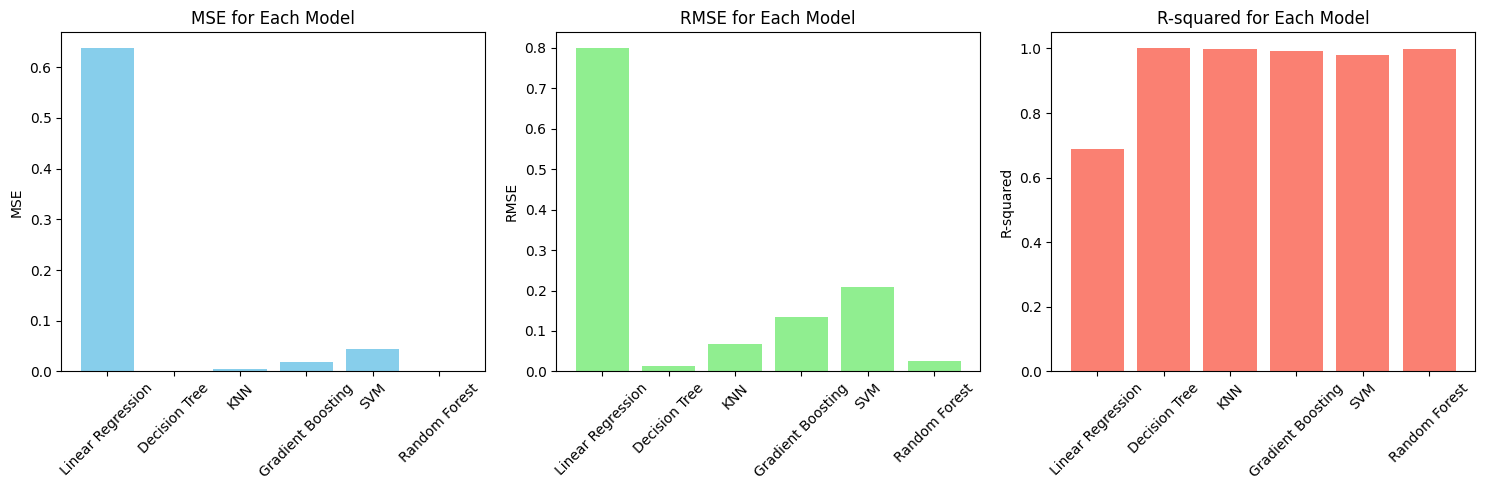

In [81]:
# Data preparation
models = ["Linear Regression", "Decision Tree", "KNN", "Gradient Boosting", "SVM", "Random Forest"]
mse_values = [lr_mse, dt_mse, knn_mse, gb_mse, svm_mse, rf_mse]
rmse_values = [lr_rmse, dt_rmse, knn_rmse, gb_rmse, svm_rmse, rf_rmse]
r2_values = [lr_r2, dt_r2, knn_r2, gb_r2, svm_r2, rf_r2]

# Creating subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# MSE Plot
axes[0].bar(models, mse_values, color='skyblue')
axes[0].set_title('MSE for Each Model')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)

# RMSE Plot
axes[1].bar(models, rmse_values, color='lightgreen')
axes[1].set_title('RMSE for Each Model')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)

# R-squared Plot
axes[2].bar(models, r2_values, color='salmon')
axes[2].set_title('R-squared for Each Model')
axes[2].set_ylabel('R-squared')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

# The table shows the performance of various machine learning models evaluated using Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared, both before and after applying Cross-Validation (CV). Let's interpret the results:

1. **Linear Regression**:
   - Without CV: Good performance with low MSE and RMSE, and a high R-squared.
   - With CV: Performance degrades, indicating the model may be overfitting to the training data and not generalizing well to unseen data.

2. **Decision Tree**:
   - Without CV: Near-perfect scores, but this might indicate overfitting.
   - With CV: Performance drops significantly, strongly suggesting overfitting to the training data.

3. **K-Nearest Neighbors (KNN)**:
   - Without CV: Moderate performance.
   - With CV: Large drop in performance, indicating the model isn't generalizing well and may be sensitive to the training data setup.

4. **Gradient Boosting**:
   - Without CV: Excellent performance.
   - With CV: Some performance drop, but still maintains relatively good scores, suggesting decent generalization.

5. **Support Vector Machine (SVM)**:
   - Without CV: Poor performance.
   - With CV: Similar performance, remaining poor, indicating the model is not suitable for this data or requires significant parameter tuning.

6. **Random Forest**:
   - Without CV: Excellent performance, similar to the Decision Tree but typically with better generalization.
   - With CV: Performance drops but still maintains good scores, indicating a better generalization compared to the Decision Tree.

## Why Results Worsen with CV:

Cross-validation involves splitting the dataset into multiple subsets and training/testing the model multiple times. This process provides a more robust evaluation by reducing the impact of the specific arrangement of the training and test set. When results worsen after applying CV, it usually indicates overfitting. Overfitting happens when a model learns the training data too well, including noise and fluctuations, thus failing to perform effectively on new, unseen data. Models like Decision Trees are particularly prone to this. The drop in performance across all models after applying CV suggests that these models, while performing well on the specific training set, are not generalizing well to new data, which is a crucial aspect of a reliable machine learning model.

This calls for actions like parameter tuning, feature selection, or using more robust or simpler models to improve the model's ability to generalize.

# Best and Worst Performers:
* *Best Performer:* The *Decision Tree* and *Random Forest* models perform exceptionally well with nearly perfect R-squared values and very low MSE and RMSE, indicating high accuracy and great fit to the data.
* *Worst Performer:* The *SVM* model shows the poorest performance with the highest MSE and RMSE and the lowest R-squared value, indicating a poor fit and less accurate predictions compared to the other models.

It's important to note that while the Decision Tree and Random Forest models show excellent performance on this dataset, such near-perfect results may sometimes indicate overfitting, especially in the case of Decision Trees. Additionally, the poor performance of the SVM model might be due to not tuning its hyperparameters or because SVMs often require feature scaling to perform well.

 ----------------------------

# Part 7: Conclusion

The comparative analysis of six machine learning models has yielded a comprehensive insight into their performance on a regression task involving electoral data. The Decision Tree and Random Forest models emerged as top performers, boasting near-perfect R-squared values, and minimal MSE and RMSE, thereby demonstrating a high accuracy and an exceptional fit to the data. Conversely, the Support Vector Machine (SVM) lagged significantly behind its counterparts, recording the highest error metrics and the lowest R-squared value, thus reflecting its poor fit and predictive accuracy for the given task.

**Recommendations**

Based on the model evaluations, the following recommendations are proposed:

1. **Model Selection**: For similar regression tasks, particularly involving electoral data, priority should be given to ensemble methods like Random Forest due to their robustness and predictive power.
2. **Model Tuning**: The SVM model requires meticulous tuning of hyperparameters, possibly through methods like grid search and randomized search, as well as feature scaling to enhance its performance.
3. **Overfitting Caution**: The near-perfect results of the Decision Tree model necessitate further investigation to rule out overfitting. Techniques such as cross-validation, pruning, or the incorporation of complexity penalties during the learning process could be beneficial.

**Future Work**

The scope for future work entails several avenues for exploration to solidify the findings of this project:

1. **Cross-Validation**: Implementing k-fold cross-validation to ensure that the model's performance is consistent across different subsets of the dataset.
2. **Feature Engineering**: Experimentation with additional feature engineering techniques could unearth more nuanced relationships within the data, potentially improving model performance.
3. **Model Ensembles**: Exploring advanced ensemble techniques like stacking or blending could leverage the strengths of individual models to achieve superior predictive performance.
4. **Hyperparameter Optimization**: Systematic hyperparameter optimization for all models, particularly SVM, could be instrumental in unlocking better model configurations and results.
5. **Temporal Analysis**: Given the dataset's real-time nature, investigating time series analysis could yield interesting temporal dynamics influencing the election outcomes.

By addressing these recommendations and future work directions, the project can serve as a stepping stone towards more nuanced models that offer both precision and generalizability in the field of electoral prediction.